# 图像几何变换

In [ ]:

import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

def cvshow(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show(img):
    if img.ndim == 2:
        plt.imshow(img,cmap="gray")
    elif img.ndim == 3:
        plt.imshow(img)
    plt.show()

In [5]:
lena = cv2.imread('images/lena.png')
print(lena.shape)
#---------近邻和插值缩放
scale_lena = cv2.resize(lena,[1024,1024], cv2.INTER_NEAREST)
cvshow(scale_lena)
# show(scale_lena[:,:,::-1])
scale_lena = cv2.resize(lena,[1024,1024])
cvshow(scale_lena)
# show(scale_lena[:,:,::-1])
#--------缩放
h, w = lena.shape[:2]
resize_img = cv2.resize(lena, (int(w*0.5),int(h*0.5)))
cvshow(resize_img)
# show(resize_img[:,:,::-1])

#---------水平和垂直翻转
flip_lena = lena[:,::-1]
# flip_lena = cv2.flip(lena,1)
cvshow(flip_lena)

(512, 512, 3)


[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


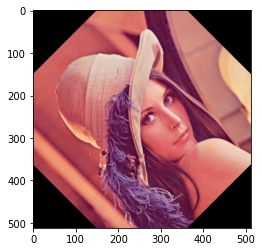

[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


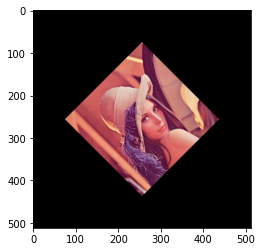

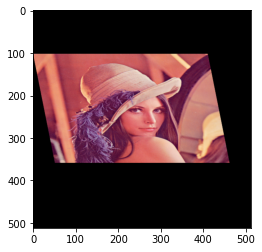

In [10]:
img = cv2.imread('images/lena.png')
#--------旋转
M = cv2.getRotationMatrix2D([w/2,h/2], 45, 1)
print(M)
rotate = cv2.warpAffine(img, M, [w,h])
show(rotate[:,:,::-1])
#---------相似性变换
M = cv2.getRotationMatrix2D([w/2,h/2], 45, 0.5)
print(M)
sim = cv2.warpAffine(img, M, [w,h])
show(sim[:,:,::-1])
#----------仿射变换
import numpy as np
p_src = np.float32([[0,0], [w-1,0], [0,h-1]])
p_dst = np.float32([[0,h*0.2], [w*0.8,h*0.2], [w*0.1,h*0.7]])
M = cv2.getAffineTransform(p_src, p_dst)
affine = cv2.warpAffine(img, M, [w,h])
show(affine[:,:,::-1])

# 图像二值化

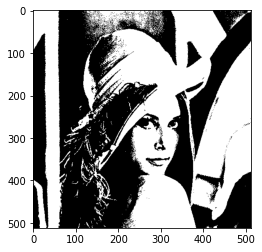

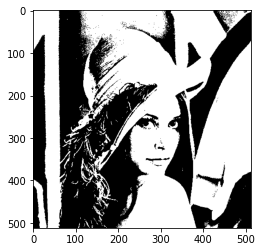

In [11]:
img = cv2.imread('images/lena.bmp', 0)
_, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) 
show(bin_img)
#-----OTSU 大津法阈值获取
_, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_OTSU) 
show(bin_img)

# 数学形态学

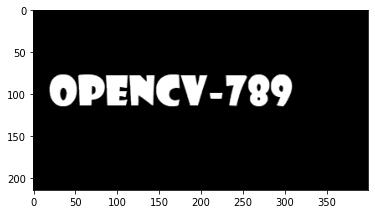

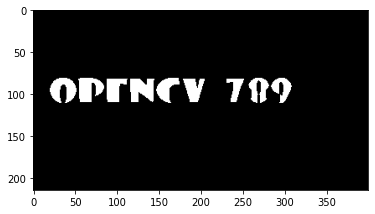

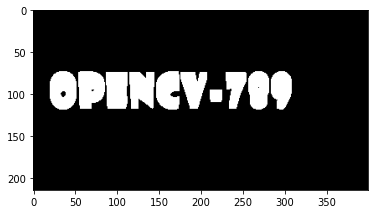

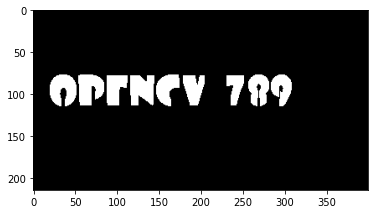

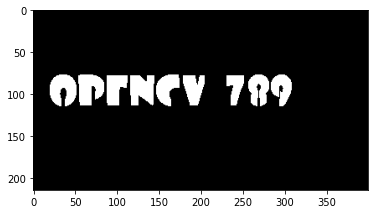

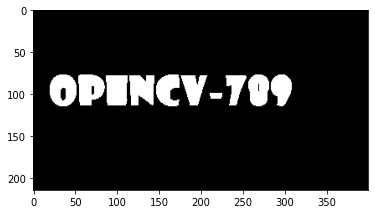

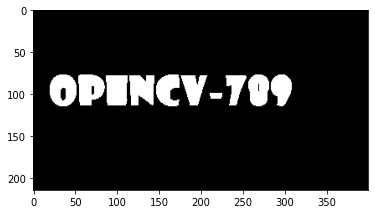

In [12]:
img = cv2.imread('images/bin.bmp', 0)
show(img)
_, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) 
#--------腐蚀
kernel = np.ones((9,1), np.uint8)
erode_img = cv2.erode(bin_img, kernel)
show(erode_img)
#---------膨胀
dilate_img = cv2.dilate(bin_img, kernel)
show(dilate_img)
#----------开运算
open_img = cv2.dilate(erode_img, kernel)
show(open_img)
open_img2 = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
show(open_img2)
#---------闭运算
close_img = cv2.erode(dilate_img, kernel)
show(close_img)
close_img2 = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
show(close_img2) 